In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [40]:
df = pd.read_pickle('my_df.pkl')

In [41]:
df.head(10)

Race Number of Deaths   Population   
0  American Indian or Alaska Native            1,878    2,832,761  \
1         Asian or Pacific Islander            8,976   11,346,496   
2         Black or African American           63,124   36,173,121   
3                             White          489,087  228,687,790   
4  American Indian or Alaska Native            1,959    2,984,150   
5         Asian or Pacific Islander            9,415   11,757,685   
6         Black or African American           63,081   36,594,309   
7                             White          492,182  230,085,762   
8  American Indian or Alaska Native            2,213    3,097,333   
9         Asian or Pacific Islander            9,992   12,429,181   

  Crude Death Rate Age Adjusted Death Rate Confidence Interval Standard Error   
0             66.3                   138.3                 3.4           0.0%  \
1             79.1                   125.4                 1.4           0.1%   
2            174.5                   257.3                 1.0           0.7%   
3            213.9                   202.9                 0.3           5.6%   
4             65.6                   130.8                 3.2           0.0%   
5             80.1                   124.7                 1.4           0.1%   
6            172.4                   253.1                 1.0           0.7%   
7            213.9                   202.2                 0.3           5.7%   
8             71.4                   140.0                 3.2           0.0%   
9             80.4                   122.7                 1.3           0.1%   

   year  
0  1999  
1  1999  
2  1999  
3  1999  
4  2000  
5  2000  
6  2000  
7  2000  
8  2001  
9  2001

In [42]:
df.isna().sum()

Race                       0
Number of Deaths           0
Population                 0
Crude Death Rate           0
Age Adjusted Death Rate    0
Confidence Interval        0
Standard Error             0
year                       0
dtype: int64

In [43]:
# remove capitals and replace spaces with underscores in column names
old_names = list(df.columns)
formatted_names = []
for name in old_names:
    name = str.lower(name)
    name = name.replace(' ', '_')
    formatted_names.append(name)

mapper = dict(zip(old_names, formatted_names))
df.rename(mapper = mapper, axis = 1, inplace = True)
df.head()

race number_of_deaths   population   
0  American Indian or Alaska Native            1,878    2,832,761  \
1         Asian or Pacific Islander            8,976   11,346,496   
2         Black or African American           63,124   36,173,121   
3                             White          489,087  228,687,790   
4  American Indian or Alaska Native            1,959    2,984,150   

  crude_death_rate age_adjusted_death_rate confidence_interval standard_error   
0             66.3                   138.3                 3.4           0.0%  \
1             79.1                   125.4                 1.4           0.1%   
2            174.5                   257.3                 1.0           0.7%   
3            213.9                   202.9                 0.3           5.6%   
4             65.6                   130.8                 3.2           0.0%   

   year  
0  1999  
1  1999  
2  1999  
3  1999  
4  2000

In [44]:
df.dtypes

race                       object
number_of_deaths           object
population                 object
crude_death_rate           object
age_adjusted_death_rate    object
confidence_interval        object
standard_error             object
year                       object
dtype: object

In [45]:
# format data to numeric type where appropriate
df = df.apply(lambda x: x.str.replace(',',''))
columns = list(df.columns)
for column in columns:
    df[column] = pd.to_numeric(df[column], errors = 'ignore')
df.head()

race  number_of_deaths  population   
0  American Indian or Alaska Native              1878     2832761  \
1         Asian or Pacific Islander              8976    11346496   
2         Black or African American             63124    36173121   
3                             White            489087   228687790   
4  American Indian or Alaska Native              1959     2984150   

   crude_death_rate  age_adjusted_death_rate  confidence_interval   
0              66.3                    138.3                  3.4  \
1              79.1                    125.4                  1.4   
2             174.5                    257.3                  1.0   
3             213.9                    202.9                  0.3   
4              65.6                    130.8                  3.2   

  standard_error  year  
0           0.0%  1999  
1           0.1%  1999  
2           0.7%  1999  
3           5.6%  1999  
4           0.0%  2000

In [46]:
df.dtypes

race                        object
number_of_deaths             int64
population                   int64
crude_death_rate           float64
age_adjusted_death_rate    float64
confidence_interval        float64
standard_error              object
year                         int64
dtype: object

In [47]:
# add column for death rate as ordinary percentage
df['death_rate'] = df['crude_death_rate'] / 1000

In [48]:
# see mean death rate grouped by race over whole time period
racial_death_rate = df[['race', 'death_rate']].groupby('race').mean()
racial_death_rate.sort_values(by = 'death_rate', ascending = False)

death_rate
race                                        
White                               0.207947
Black or African American           0.163773
Asian or Pacific Islander           0.081980
American Indian or Alaska Native    0.068773

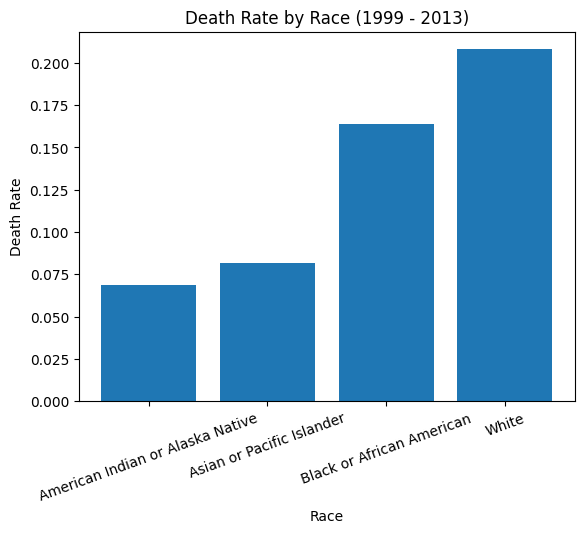

In [49]:
plt.bar(x = racial_death_rate.index, height = racial_death_rate['death_rate'])
plt.xticks(rotation = 20)
plt.title('Death Rate by Race (1999 - 2013)')
plt.ylabel('Death Rate')
plt.xlabel('Race')
plt.show()

In [50]:
racial_death_rate['death_rate'].max() - racial_death_rate.min()

death_rate    0.139173
dtype: float64

From the above bar graph we can see that the White racial group has the highest proportional death rate from cancer over the whole time period compared to all the other races. Both the White and Black or African American racial groups have a much higher death rate than the American Indian or Alaskan Native and Asian or Pacific Islander, a difference of 0.08%. The overall range of proportional deathrates was only about 0.14%, so the deathrates for each race really doesn't differ by much. We will perform an ANOVA test to see if there is a statistical difference in the death rates between the racial groups.

### Racial Death Rate ANOVA

H0: There is no difference among the death rates for each racial group.

H<sub>a</sub>: There is a difference in at least one of the racial death rates. 

Three conditions for an ANOVA test need to be established, Independence of independence of observations, normality, and homogeneity of variances. We explore these conditions.

1. Independence of observations: It is not at all the case that these racial groups are necessesarily independent. We know an individual can bear membership to more than one racial group, and even if, for the puruposes of a study a researcher wanted these groups to be exclusive, we don't know if that was established in this particular dataset. For the sake of the exercise and its pedagogical value, we will continue the test nonetheless. 
2. Normality. We use a one sample Kolmogorov-Smirnov test on each of the racial group's cancer death rates to establish normality. This test compares the empirical distribution function of a passed data set to a specified cumulative distriubtion funciton. The tests null hypothesis is that the sample distribution passed into the function (death rate of a race) is equal to the specified general distribution (normal in this case). With a standard 0.05 significance threshold
3. 

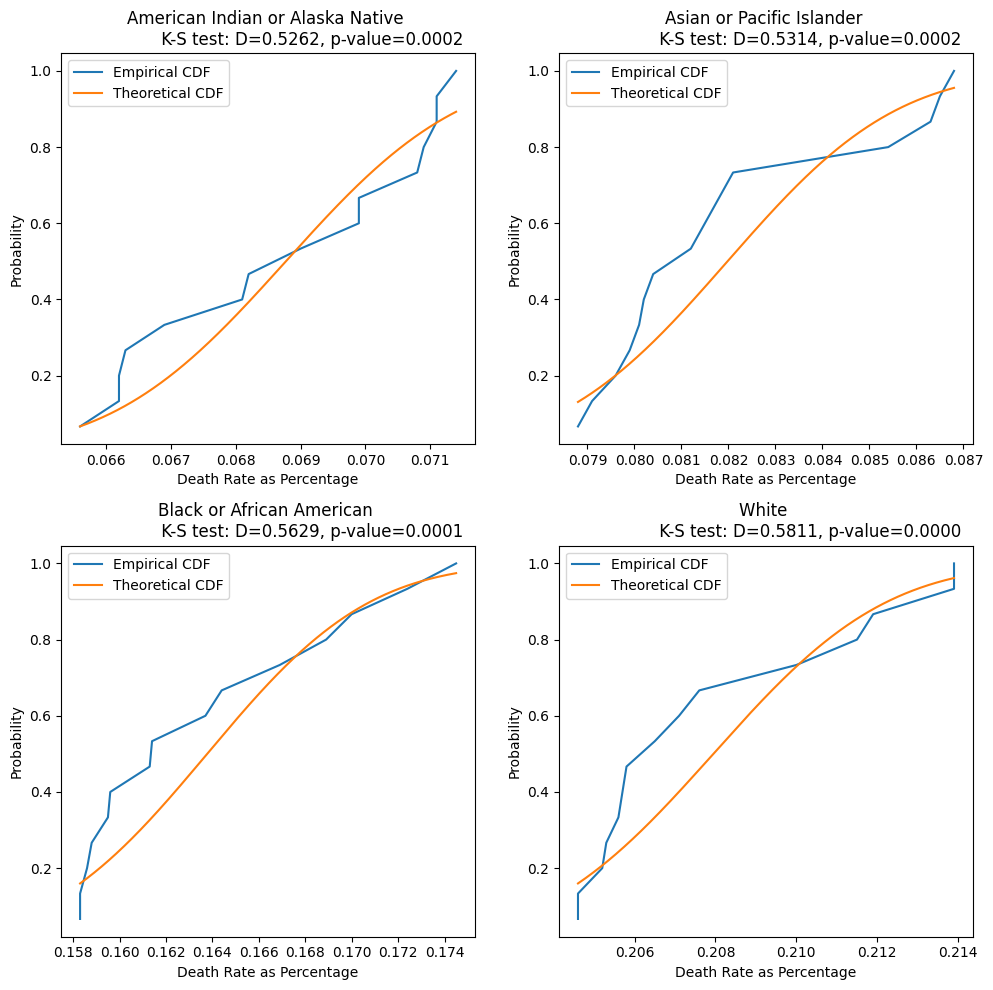

In [101]:
import math

races = df['race'].unique()
n = len(races)
cols = 2
rows = math.ceil(n / cols)

fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
for i, race in enumerate(races):
    ax = axs[i // cols, i % cols]

    sample = df[df['race'] == race]['death_rate']
    mean = sample.mean()
    std = sample.std()

    # Perform the K-S test against a normal distribution
    d, p_value = kstest(sample, 'norm')

    # Calculate the CDFs
    x = np.sort(sample)
    y = np.arange(1, len(sample)+1) / len(sample)  # Scale y-axis to be between 0 and 1 to represent probability for empirical CDF

    x_theoretical = np.linspace(min(x), max(x), 1000) # Simulate continuous distribution of sample data
    cdf_theoretical = norm.cdf(x_theoretical, mean, std)  # Use norm.cdf function to generate theoretical CDF, centered on sample's statistics

    # Plot both CDFs for comparison
    ax.plot(x, y, label='Empirical CDF')
    ax.plot(x_theoretical, cdf_theoretical, label='Theoretical CDF')
    ax.set_title(f'''{race} 
                 K-S test: D={d:.4f}, p-value={p_value:.4f}''')
    ax.legend()
    # Set labels for x and y axes
    ax.set_xlabel('Death Rate as Percentage')
    ax.set_ylabel('Probability')

# Remove empty subplots
if n % cols != 0:
    for j in range(i+1, rows*cols):
        fig.delaxes(axs.flatten()[j])



plt.tight_layout()
plt.show()

In [62]:
# see death rate of all races aggregated over the time period
death_rate_over_time = df[['year', 'death_rate']].groupby('year').mean()
death_rate_over_time

death_rate
year            
1999    0.133450
2000    0.133000
2001    0.133425
2002    0.132050
2003    0.130750
2004    0.130550
2005    0.130900
2006    0.129050
2007    0.129100
2008    0.128975
2009    0.127900
2010    0.130425
2011    0.129200
2012    0.130275
2013    0.130225

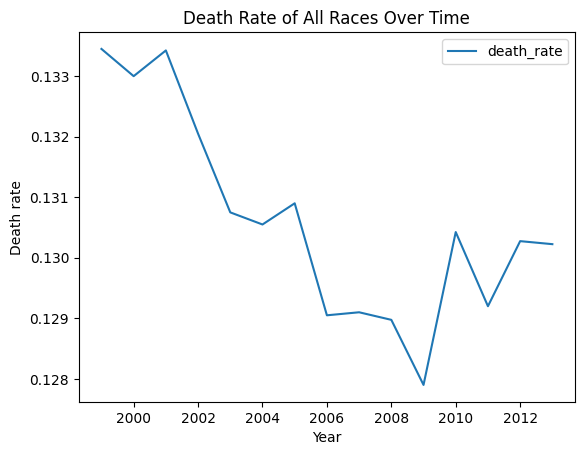

In [63]:
death_rate_over_time.plot(xlabel="Year", ylabel="Death rate", title = 'Death Rate of All Races Over Time')
plt.show()

The mean death rate of all races over the time period seems to have a downward trend between the years of 1999 and 2009, after which it looks like it picks back up. 

Let's look at a linear regression t test to see if time and cancer deaths are linearly related. While the graphs strongly suggest an inverse relationship between time and death rate, at least between the years of 1999 and 2009, we have a hunch that cancer death rates are actually going up. Therefore we will perform a two sided t test, and not specify the direction of the linear relationship in our alternative hypothesis.

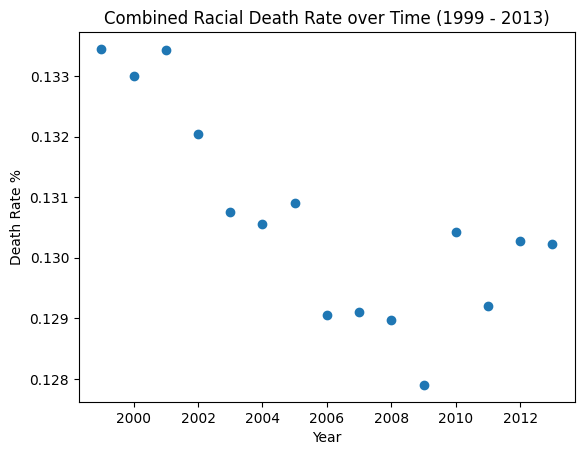

In [64]:
plt.scatter(x = death_rate_over_time.index, y = death_rate_over_time['death_rate'])
plt.title('Combined Racial Death Rate over Time (1999 - 2013)')
plt.ylabel('Death Rate %')
plt.xlabel('Year')
plt.show()

In [65]:
# H0: There is no linear relationship between time and cancer death rate.
# HA: There is a linear relationship between time and cancer death rate.



In [66]:
df['race'].unique()

array(['American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White'], dtype=object)

In [67]:
# look at the death rate over time for each race separately
racial_dr_over_time = pd.DataFrame(index = range(len(df['year'].unique())))

for race in df['race'].unique():
    racial_dr_over_time[race] = df[df['race'] == race]['death_rate'].reset_index(drop = True)
racial_dr_over_time.set_index(df['year'].unique(), inplace = True)
racial_dr_over_time

American Indian or Alaska Native  Asian or Pacific Islander   
1999                            0.0663                     0.0791  \
2000                            0.0656                     0.0801   
2001                            0.0714                     0.0804   
2002                            0.0690                     0.0788   
2003                            0.0662                     0.0799   
2004                            0.0711                     0.0796   
2005                            0.0708                     0.0815   
2006                            0.0681                     0.0802   
2007                            0.0682                     0.0812   
2008                            0.0699                     0.0821   
2009                            0.0669                     0.0818   
2010                            0.0709                     0.0854   
2011                            0.0662                     0.0865   
2012                            0.0699                     0.0868   
2013                            0.0711                     0.0863   

      Black or African American   White  
1999                     0.1745  0.2139  
2000                     0.1724  0.2139  
2001                     0.1700  0.2119  
2002                     0.1689  0.2115  
2003                     0.1669  0.2100  
2004                     0.1644  0.2071  
2005                     0.1637  0.2076  
2006                     0.1614  0.2065  
2007                     0.1613  0.2057  
2008                     0.1586  0.2053  
2009                     0.1583  0.2046  
2010                     0.1596  0.2058  
2011                     0.1595  0.2046  
2012                     0.1588  0.2056  
2013                     0.1583  0.2052

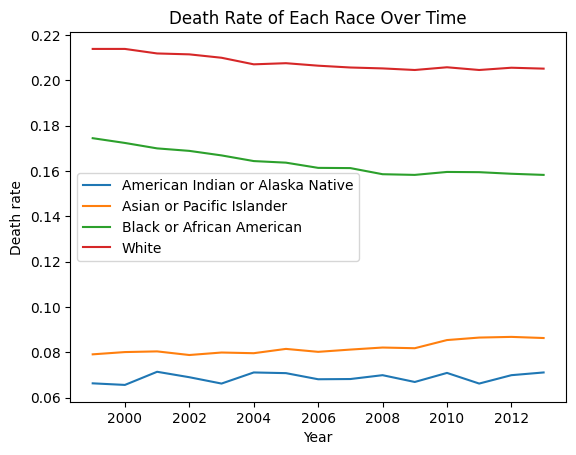

In [68]:
racial_dr_over_time.plot(xlabel="Year", ylabel="Death rate", title = 'Death Rate of Each Race Over Time')
plt.show()

Seeing how each race's death rate varies over time clarifies the combined racial death rate a little bit. Curiously, the White and Black or African American death rates have gone down, while the Asian or Pacific islander and American Indian or Alaska Native death rates have gone up. Again, the increase or decrease in death rate is quite small, only fractions of a percent.

# 